<a href="https://colab.research.google.com/github/puyopy/puyopyy.github.io/blob/main/Model_Natural_Style_DLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ File DITEMUKAN! Memulai proses...


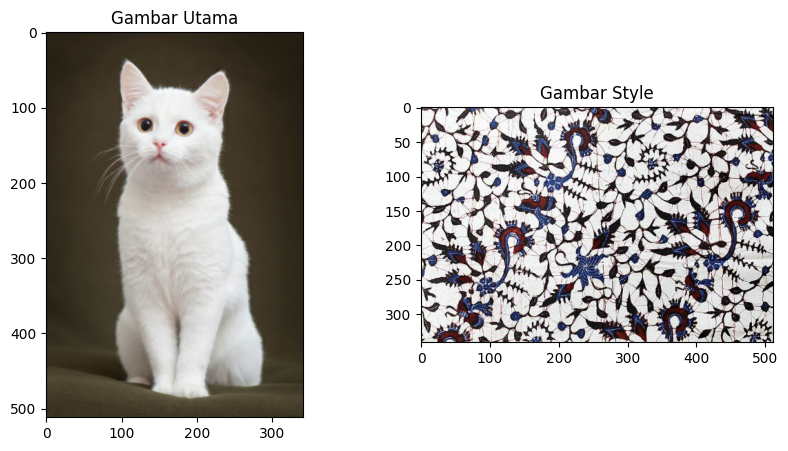


Sedang memproses (Download model & Generate)...


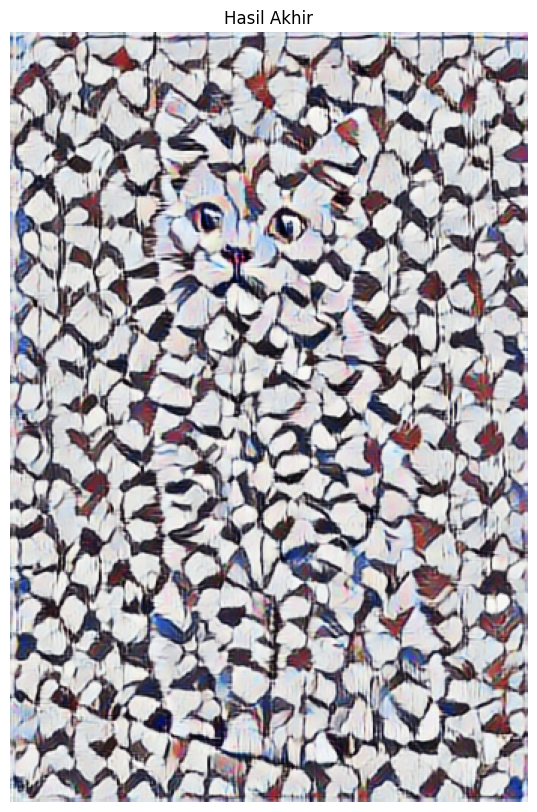


✅ BERHASIL! File tersimpan di: /content/drive/MyDrive/Colab Notebooks/DEEP LEARNING DASAR/.ipynb_checkpoints/HASIL_JADI.jpg


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive

# --- 1. MOUNT GOOGLE DRIVE ---
drive.mount('/content/drive')

# --- 2. LOKASI FOLDER & NAMA FILE ---
# Path folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/DEEP LEARNING DASAR/.ipynb_checkpoints'

# Nama file (Sesuai koreksi: Satu 'R')
nama_file_utama = 'GAMBAR_UTAMA.jpg'
nama_file_style = 'GAMBAR_STYLE.jpg'

# Gabungkan path lengkap
content_path = os.path.join(folder_path, nama_file_utama)
style_path = os.path.join(folder_path, nama_file_style)

# --- 3. CEK FILE ---
if not os.path.exists(content_path) or not os.path.exists(style_path):
    print(f"\n❌ ERROR: File masih belum ditemukan!")
    print(f"Mencari di: {folder_path}")
    print(f"File 1: {nama_file_utama}")
    print(f"File 2: {nama_file_style}")
else:
    print(f"\n✅ File DITEMUKAN! Memulai proses...")

    # --- 4. FUNGSI ---
    def load_img(path_to_img):
        max_dim = 512
        img = tf.io.read_file(path_to_img)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)
        shape = tf.cast(tf.shape(img)[:-1], tf.float32)
        long_dim = max(shape)
        scale = max_dim / long_dim
        new_shape = tf.cast(shape * scale, tf.int32)
        img = tf.image.resize(img, new_shape)
        img = img[tf.newaxis, :]
        return img

    def imshow(image, title=None):
        if len(image.shape) > 3:
            image = tf.squeeze(image, axis=0)
        plt.imshow(image)
        if title:
            plt.title(title)

    # Load Gambar
    content_image = load_img(content_path)
    style_image = load_img(style_path)

    # Tampilkan Preview
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    imshow(content_image, 'Gambar Utama')
    plt.subplot(1, 2, 2)
    imshow(style_image, 'Gambar Style')
    plt.show()

    # --- 5. PROSES STYLE TRANSFER ---
    print("\nSedang memproses (Download model & Generate)...")
    hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

    # --- 6. HASIL ---
    plt.figure(figsize=(10, 10))
    imshow(stylized_image, 'Hasil Akhir')
    plt.axis('off')
    plt.show()

    # Simpan hasil
    output_filename = 'HASIL_JADI.jpg'
    output_full_path = os.path.join(folder_path, output_filename)
    tf.keras.preprocessing.image.save_img(output_full_path, stylized_image[0])

    print(f"\n✅ BERHASIL! File tersimpan di: {output_full_path}")